<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

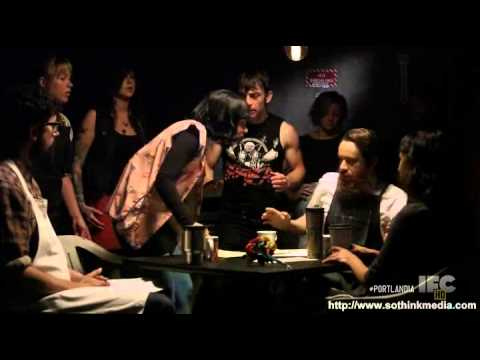

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/ianforrest/Desktop/coding/repos/ianforrest11/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd
import re

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)

In [4]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# create function to:
# remove ' star rating' from star_rating column, convert to float
# extract date from full_review_text column to new date column, convert to datetime
# remove date from full_review_text column
# remove 'check-in' text

def wrangle(df):
    df = df.copy()
    
    df['star_rating'] = df['star_rating'].str.replace(' star rating', '').astype(float)
    
    df['date'] = df['full_review_text'].str.extract(r"(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)")
    df['date'] = pd.to_datetime(df['date'])
    
    df['full_review_text'] = df['full_review_text'].str.replace('(\d{1,2}[/. ](?:\d{1,2}|January|Jan)[/. ]\d{2}(?:\d{2})?)', '')
    df['full_review_text'] = df['full_review_text'].str.replace('(\d*)', '').str.strip().str.lstrip('check-in ')
    df['shop_review_count'] = df.groupby('coffee_shop_name')['coffee_shop_name'].transform('count')
    
    return df

In [6]:
# create updated dataframe
df = wrangle(shops)

In [7]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,shop_review_count
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5.0,2016-11-25,244
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,2016-12-02,244
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0,2016-11-30,244
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,2016-11-25,244
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0,2016-12-03,244


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [8]:
# Object from Base Python
from collections import Counter

# import 'count' function from lecture
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [9]:
# import spacy/large english language processor
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en.stop_words import STOP_WORDS


nlp = spacy.load('en_core_web_lg')

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [10]:
# initial Tokenizer Pipe, no removal of stop words

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [11]:
# apply 'count' function to 'token' column of dataframe
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
43,the,6520,27779,1.0,0.035209,0.035209,0.856092
38,and,6804,25748,2.0,0.032635,0.067843,0.893382
28,a,6181,22085,3.0,0.027992,0.095835,0.811581
13,I,5469,19780,4.0,0.025070,0.120906,0.718093
60,,4759,17212,5.0,0.021816,0.142721,0.624869


In [12]:
# Tokenizer Pipe with removal of default stop words
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [13]:
# apply 'count' function to 'token' column of dataframe
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
34,,4759,17212,1.0,0.042994,0.042994,0.624869
37,coffee,4207,8055,2.0,0.020121,0.063115,0.552390
112,place,3029,4264,3.0,0.010651,0.073766,0.397715
76,great,2439,3251,4.0,0.008121,0.081887,0.320247
279,it's,2059,3115,5.0,0.007781,0.089668,0.270352


In [14]:
# add coffee-specific stop words to default stop_words list
nlp.Defaults.stop_words |= {" ","  ", "it's", "i", "coffee", "i'm", "i've", "it", "place"}

In [15]:
nlp.vocab.add_flag(lambda s: s.lower() in spacy.lang.en.stop_words.STOP_WORDS, spacy.attrs.IS_STOP)

12

In [16]:
# Tokenizer Pipe with removal of default stop words and coffee-specific stop words
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [17]:
# apply 'count' function to 'token' column of dataframe
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
74,great,2439,3251,1.0,0.008929,0.008929,0.320247
173,like,2034,2902,2.0,0.007971,0.016900,0.267069
185,good,2084,2779,3.0,0.007633,0.024533,0.273634
30,love,1434,1806,4.0,0.004960,0.029493,0.188288
767,little,1230,1479,5.0,0.004062,0.033555,0.161502


In [18]:
# visualize top 20 token words based on percentage
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show();

<Figure size 640x480 with 1 Axes>

In [19]:
# import get_lemmas function from lecture
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [20]:
# add 'lemmas' column to df
df['lemmas'] = df['full_review_text'].apply(get_lemmas)

In [21]:
df['lemmas'].head()

0    [love, love, love, atmosphere, corner, shop, s...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [list, Brunch, Spots, love, eclectic, homey, p...
3    [cool, decor, good, drink, nice, seating, over...
4    [locate, Northcross, mall, shopping, center, f...
Name: lemmas, dtype: object

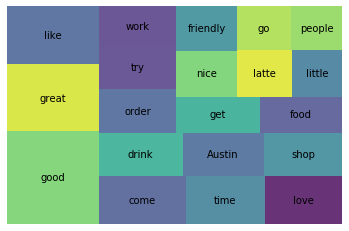

In [22]:
# visualize top 20 lemma words as percentage of total
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show();

In [23]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# create dataframe that contains shop name, avg rating, and total review count
ratings = df.groupby('coffee_shop_name').mean().sort_values(by='star_rating', ascending=False).reset_index()
ratings = ratings.merge(df['shop_review_count'], how='left').drop_duplicates(['coffee_shop_name']).sort_values(by=['shop_review_count','star_rating'], ascending=False).reset_index().drop(columns='index')
#ratings = ratings[ratings['shop_review_count'] > 50]
ratings_scaled = ratings.copy()
scaler = StandardScaler()
ratings_scaled[['shop_review_count', 'star_rating']] = scaler.fit_transform(ratings_scaled[['shop_review_count', 'star_rating']])
ratings_scaled = ratings_scaled.rename(columns={"shop_review_count": "shop_review_count_scaled", "star_rating": "star_rating_scaled"})
ratings = ratings.merge(ratings_scaled)
ratings['avg_rating_bin'] = pd.cut(ratings['star_rating'], [3,3.5,4,4.5,5], labels=['3 - 3.5','3.5 - 4', '4 - 4.5', '4.5 - 5'])
ratings = ratings.sort_values(by=['star_rating', 'shop_review_count'], ascending=False)



ratings.head(25)

/Users/ianforrest/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ianforrest/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,coffee_shop_name,star_rating,shop_review_count,star_rating_scaled,shop_review_count_scaled,avg_rating_bin
77,The Marvelous Vintage Tea Party Co.,5.000000,10,2.176892,-1.518110,4.5 - 5
78,Lola Savannah Coffee Downtown,5.000000,4,2.176892,-1.623528,4.5 - 5
67,Mañana Coffee & Juice,4.848485,33,1.736258,-1.114007,4.5 - 5
66,Brian’s Brew,4.844444,45,1.724508,-0.903171,4.5 - 5
64,Third Coast Coffee Roasting Company,4.821429,56,1.657573,-0.709904,4.5 - 5
72,Flitch Coffee,4.821429,28,1.657573,-1.201855,4.5 - 5
76,Kowabunga Coffee,4.812500,16,1.631608,-1.412692,4.5 - 5
3,Venezia Italian Gelato,4.810000,200,1.624337,1.820130,4.5 - 5
73,Legend Coffee,4.714286,28,1.345982,-1.201855,4.5 - 5
63,Fleet Coffee,4.701754,57,1.309539,-0.692335,4.5 - 5


In [24]:
ratings['avg_rating_bin'].value_counts()

4 - 4.5    38
4.5 - 5    20
3.5 - 4    20
3 - 3.5     1
Name: avg_rating_bin, dtype: int64

/Users/ianforrest/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


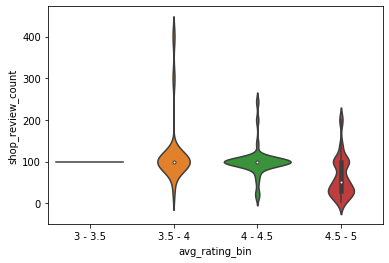

In [25]:
sns.violinplot(x="avg_rating_bin", y="shop_review_count", data=ratings, bw = .3);

In [26]:
# split data for Genuine Joe - Ed Chin TL group
df_gj = df[df['coffee_shop_name'].str.contains("Genuine Joe")]

In [27]:
df_gj.head()

,coffee_shop_name,full_review_text,star_rating,date,shop_review_count,tokens,lemmas
5241,Genuine Joe,Seriously the best Iced Chai in Austin. I am ...,5.0,2016-11-27,100,"[seriously, best, iced, chai, austin., fan, ti...","[seriously, good, Iced, Chai, Austin, fan, tir..."
5242,Genuine Joe,Room nice. Plain coffee meh. They have intri...,4.0,2016-11-06,100,"[room, nice., plain, meh., intriguing, over-th...","[room, nice, Plain, meh, intriguing, mocha, he..."
5243,Genuine Joe,The artist group I belong to had a planning me...,4.0,2016-08-25,100,"[artist, group, belong, planning, meeting, eas...","[artist, group, belong, planning, meeting, Eas..."
5244,Genuine Joe,I came here because it was the highest rated c...,4.0,2016-06-09,100,"[came, highest, rated, shop, near, time,, happ...","[come, high, rate, shop, near, time, happy, bi..."
5245,Genuine Joe,Hands down my favorite coffee shop in Austin. ...,5.0,2016-11-23,100,"[hands, favorite, shop, austin., vibe, perfect...","[hand, favorite, shop, Austin, vibe, perfect, ..."


In [28]:
df_gj['star_rating'].mean()

3.95

In [29]:
# create sub-dataframes for good ratings and bad ratings of Genuine Joe's
df_gj_good = df_gj[df_gj['star_rating'] >= 4]
df_gj_bad = df_gj[df_gj['star_rating'] < 4]

In [30]:
df_gj_good.head()

,coffee_shop_name,full_review_text,star_rating,date,shop_review_count,tokens,lemmas
5241,Genuine Joe,Seriously the best Iced Chai in Austin. I am ...,5.0,2016-11-27,100,"[seriously, best, iced, chai, austin., fan, ti...","[seriously, good, Iced, Chai, Austin, fan, tir..."
5242,Genuine Joe,Room nice. Plain coffee meh. They have intri...,4.0,2016-11-06,100,"[room, nice., plain, meh., intriguing, over-th...","[room, nice, Plain, meh, intriguing, mocha, he..."
5243,Genuine Joe,The artist group I belong to had a planning me...,4.0,2016-08-25,100,"[artist, group, belong, planning, meeting, eas...","[artist, group, belong, planning, meeting, Eas..."
5244,Genuine Joe,I came here because it was the highest rated c...,4.0,2016-06-09,100,"[came, highest, rated, shop, near, time,, happ...","[come, high, rate, shop, near, time, happy, bi..."
5245,Genuine Joe,Hands down my favorite coffee shop in Austin. ...,5.0,2016-11-23,100,"[hands, favorite, shop, austin., vibe, perfect...","[hand, favorite, shop, Austin, vibe, perfect, ..."


In [31]:
df_gj_bad.head()

,coffee_shop_name,full_review_text,star_rating,date,shop_review_count,tokens,lemmas
5247,Genuine Joe,"Sunday morning, no breakfast tacos for you! No...",3.0,2016-06-12,100,"[sunday, morning,, breakfast, tacos, you!, bre...","[Sunday, morning, breakfast, taco, breakfast, ..."
5248,Genuine Joe,Listed in Coffee Shop Working I liked the atmo...,3.0,2016-11-10,100,"[listed, shop, working, liked, atmosphere, her...","[list, Shop, Working, like, atmosphere, small,..."
5249,Genuine Joe,Eh. I found this randomly while trying to find...,2.0,2016-01-14,100,"[eh., found, randomly, trying, find, work, hou...","[eh, find, randomly, try, find, work, hour, wi..."
5257,Genuine Joe,"I'm a huge fan of the grungy, hipster coffee s...",2.0,2014-11-29,100,"[huge, fan, grungy,, hipster, shop., however,,...","[huge, fan, grungy, hipster, shop, pull, grung..."
5258,Genuine Joe,I am sitting in GJ right now drinking the wors...,1.0,2015-11-22,100,"[sitting, gj, right, drinking, worst, american...","[sit, GJ, right, drink, bad, Americano, life, ..."


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [32]:
# apply 'count' function to 'token' column of dataframe
wc_good = count(df_gj_good['lemmas'])
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
22,good,39,52,1.0,0.017299,0.017299,0.520000
87,room,25,42,2.0,0.013972,0.031271,0.333333
69,like,23,38,3.0,0.012641,0.043912,0.306667
10,great,33,37,4.0,0.012309,0.056221,0.440000
63,work,28,37,5.0,0.012309,0.068530,0.373333


In [33]:
wc_bad = count(df_gj_bad['lemmas'])
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
22,like,13,16,1.0,0.016393,0.016393,0.52
29,good,9,13,2.0,0.013320,0.029713,0.36
34,work,7,11,3.0,0.011270,0.040984,0.28
61,people,9,11,4.0,0.011270,0.052254,0.36
89,go,8,11,5.0,0.011270,0.063525,0.32


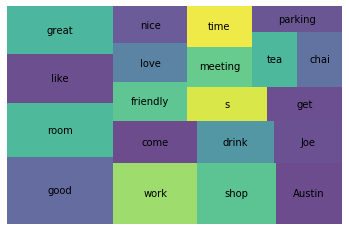

In [34]:
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

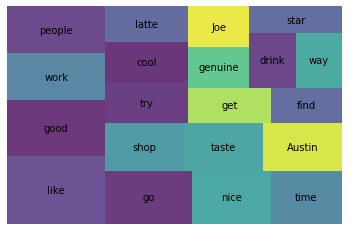

In [35]:
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [36]:
df_venezia = df[df['coffee_shop_name'].str.contains("Anderson’s Coffee Company")]
df_venezia.head()

,coffee_shop_name,full_review_text,star_rating,date,shop_review_count,tokens,lemmas
2332,Anderson’s Coffee Company,"Listed in Austin Essentials, Can They Kick It?...",5.0,2016-07-04,100,"[listed, austin, essentials,, kick, it?,, aust...","[list, Austin, Essentials, kick, Austin, Time,..."
2333,Anderson’s Coffee Company,Can't beat a oz cup of freshly brewed coffee f...,5.0,2016-02-27,100,"[can't, beat, oz, cup, freshly, brewed, $., pl...","[beat, oz, cup, freshly, brew, $, fabulous, co..."
2334,Anderson’s Coffee Company,I've been living in Austin for years and when...,5.0,2016-10-23,100,"[living, austin, years, discovered, anderson's...","[live, Austin, year, discover, Anderson, hook,..."
2335,Anderson’s Coffee Company,This is as vintage Austin as it gets. See fol...,5.0,2016-09-28,100,"[vintage, austin, gets., folks,, hipsters, mov...","[vintage, Austin, get, folk, hipster, move, to..."
2336,Anderson’s Coffee Company,"This is such an interesting place, I'm honestl...",3.0,2015-11-23,100,"[interesting, place,, honestly, completely, sp...","[interesting, honestly, completely, split, mid..."


In [37]:
df_ven_good = df_venezia[df_venezia['star_rating'] >= 4]
df_ven_bad = df_venezia[df_venezia['star_rating'] < 4]

In [38]:
wcv_good = count(df_ven_good['lemmas'])
wcv_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
72,Anderson,51,112,1.0,0.026230,0.026230,0.560440
263,bean,35,67,2.0,0.015691,0.041920,0.384615
35,good,38,63,3.0,0.014754,0.056674,0.417582
124,cup,34,62,4.0,0.014520,0.071194,0.373626
31,Austin,34,47,5.0,0.011007,0.082201,0.373626


In [39]:
wcv_bad = count(df_ven_bad['lemmas'])
wcv_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
43,store,4,7,1.0,0.011905,0.011905,0.444444
97,like,5,7,2.0,0.011905,0.023810,0.555556
77,coffee,3,7,3.0,0.011905,0.035714,0.333333
23,shop,2,6,4.0,0.010204,0.045918,0.222222
17,try,3,6,5.0,0.010204,0.056122,0.333333


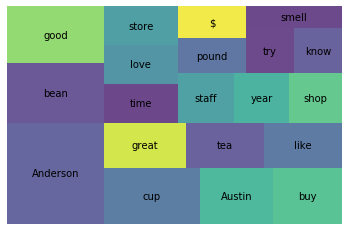

In [40]:
wcv_top20_good = wcv_good[wcv_good['rank'] <= 20]

squarify.plot(sizes=wcv_top20_good['pct_total'], label=wcv_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

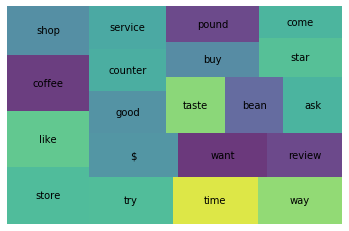

In [41]:
wcv_top20_bad = wcv_bad[wcv_bad['rank'] <= 20]

squarify.plot(sizes=wcv_top20_bad['pct_total'], label=wcv_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 



In [42]:
wc_bad['appears_in_pct_bad_rvw'] = wc_bad['appears_in_pct']
wc_good['appears_in_pct_good_rvw'] = wc_good['appears_in_pct']

In [43]:
diff_df = wc_good[['word', 'appears_in_pct_good_rvw']].merge(wc_bad[['word', 'appears_in_pct_bad_rvw']], how='outer')
wc_good.shape, wc_bad.shape, diff_df.shape

((1143, 8), (534, 8), (1372, 3))

In [44]:
diff_df.head()

,word,appears_in_pct_good_rvw,appears_in_pct_bad_rvw
0,good,0.520000,0.36
1,room,0.333333,0.08
2,like,0.306667,0.52
3,great,0.440000,0.08
4,work,0.373333,0.28


In [45]:
diff_df['diff'] = abs(diff_df['appears_in_pct_good_rvw'] - diff_df['appears_in_pct_bad_rvw'])

In [46]:
diff_df = diff_df.sort_values(by='diff', ascending=False)

In [47]:
diff_df.head(20)

,word,appears_in_pct_good_rvw,appears_in_pct_bad_rvw,diff
3,great,0.440000,0.08,0.360000
1,room,0.333333,0.08,0.253333
95,go,0.093333,0.32,0.226667
2,like,0.306667,0.52,0.213333
13,s,0.240000,0.04,0.200000
26,people,0.160000,0.36,0.200000
19,parking,0.213333,0.04,0.173333
351,taste,0.026667,0.20,0.173333
0,good,0.520000,0.36,0.160000
758,night,0.013333,0.16,0.146667
